# Carlson's Thm: Direct Analytic Continuation

This notebook will aim to implement some of the ideas in two papers:
- cond-mat/0109175v1
- hep-lat/1101.5534
The basic idea is to use Carlson's theorem to frame the spectral function reconstruction problem as a well-posed problem in the limit where we have access to infinite Matsubara frequencies, and approximate it when we have finite data. The resulting retarded correlator is a power series in the complex plane.

### Setup (from hep-lat/1101.5534)
Here we consider a bosonic Euclidean-time correlator $\mathcal G(\tau, \cdot)$ in thermal field theory, with period given by the $\beta = T^{-1}$, i.e. $\mathcal G(\tau + k\beta, \cdot) = \mathcal G(\tau, \cdot)$ for any $k\in\mathbb Z$. Here $\cdot$ represents any external variables that enter the correlator, like 3-momentum. 
- The correlator is analytic everywhere, with the exception of the cuts at $\mathrm{Re}(\tau) = k\beta$, where the correlator is continuous only. 
- Because we are dealing with a bosonic correlator, it is an even function across the imaginary axis, $\mathcal G(\beta - \tau, \cdot) = \mathcal G(\tau, \cdot)$ for $\tau\in (0, \beta)$. 
- In a finite volume, the Matsubara frequencies are $\omega_n = 2\pi n T = \frac{2\pi n}{\beta}$, with $n\in\mathbb Z$, and the Fourier transform of the correlator is:
  \begin{equation}
      \tilde{\mathcal G}(\omega_n, \cdot) = \int_0^\beta d\tau\, e^{i\omega_n\tau} \mathcal G(\tau, \cdot)
  \end{equation}
- The basic quantity of interest is the sum over positive frequencies of the Matsubara modes:
  \begin{equation}
      \mathcal G^+(\tau, \cdot)\equiv T \sum_{\omega_n\geq 0} \tilde{\mathcal G}(\omega_n, \cdot) e^{-i\omega_n\tau}.
  \end{equation}
  This correlator is analytic for $\mathrm{Im}(\tau) < 0$ but has cuts in the upper half-plane at $\tau = k\beta$. Note that the temporal variables can get a bit confusing. The $\tau$ plane is shown in the figure below. We see the cuts in $\mathcal G^+$ at $\tau = k\beta\in\mathbb R$, i.e. at real Euclidean time (imaginary time). 
    - The discontinuity across each cut is defined as $J^+$:
      \begin{equation}
          J^+(t, \cdot) \equiv i \left[ \mathcal G^+(\epsilon + it, \cdot) - \mathcal G^+(-\epsilon + it, \cdot) \right].
      \end{equation}
      for $t > 0$. 
    - The discontinuity is defined in **real time**; one can see from the definition that it's evaluated first on the right of the imaginary axis in Euclidean space, then on the left. In terms of the real-time plane, $\tau\rightarrow i\tau$, so the contour $\epsilon + i\tau\rightarrow i\epsilon - \tau$, i.e. in real-time space corresponds to the negative time axis, shifted up by $\epsilon$. So, in terms of real time, the discontinuity is:
      \begin{equation}
          J^+(t, \cdot) \equiv i \left[ \mathcal G^+(t = -t + i\epsilon, \cdot) - \mathcal G^+(t = -t -i \epsilon, \cdot) \right] = i \left[ \mathcal G^+(t = t + i\epsilon, \cdot) - \mathcal G^+(t = t -i \epsilon, \cdot) \right].
      \end{equation}
      where we use the symmetry $t\rightarrow -t$ for bosonic correlators, for $t\in\mathbb R$. 
    - The discontinuity $J^+$ is directly related to the retarded correlator $\mathcal R(\omega)$: it is its Fourier transform. We Laplace transform $J^+$,
      \begin{equation}
          \tilde{J}^+(\zeta, \cdot) \equiv \int_0^\infty dt\, e^{-\zeta t} J^+ (t, \cdot),
      \end{equation}
      which is analytic for $\mathrm{Re}\,\zeta > 0$) in the right-half of the complex plane.
    - Consider evaluating $\tilde{J}^+(\zeta, \cdot)$ at a Matsubara frequency $\omega_n$. **The claim is that $\tilde{J}^+(\zeta = \omega_n)$ equals $\tilde{\mathcal G}(\omega_n)$, although I am having trouble showing this** (I think the absolute mess of definitions and domains has made it hard for me to know what I'm computing...)
    - The value of $\tilde{J}^+(\zeta, \cdot)$ on the axis $\zeta = \epsilon - i\omega$ equals the Fourier transform of the retarded correlator,
      \begin{equation}
          \tilde{\mathcal R}(\omega, \cdot) = \tilde{J}^+(\zeta = \epsilon - i\omega, \cdot),
      \end{equation}
      for $\omega\in\mathbb R$. The imaginary part of this as $\epsilon\rightarrow 0$ is the spectral function (or $\pi$ times the spectral function). 
- The object of interest to compute is therefore $\tilde{J}^+(\zeta, \cdot)$ from the input frequencies $\tilde{\mathcal G}(\omega_n)$ (here $\omega_n$ is imaginary energy, i.e. the Euclidean frequencies. In our notation, $G(i\omega_n)$, or $G_E(\omega_n)$. 

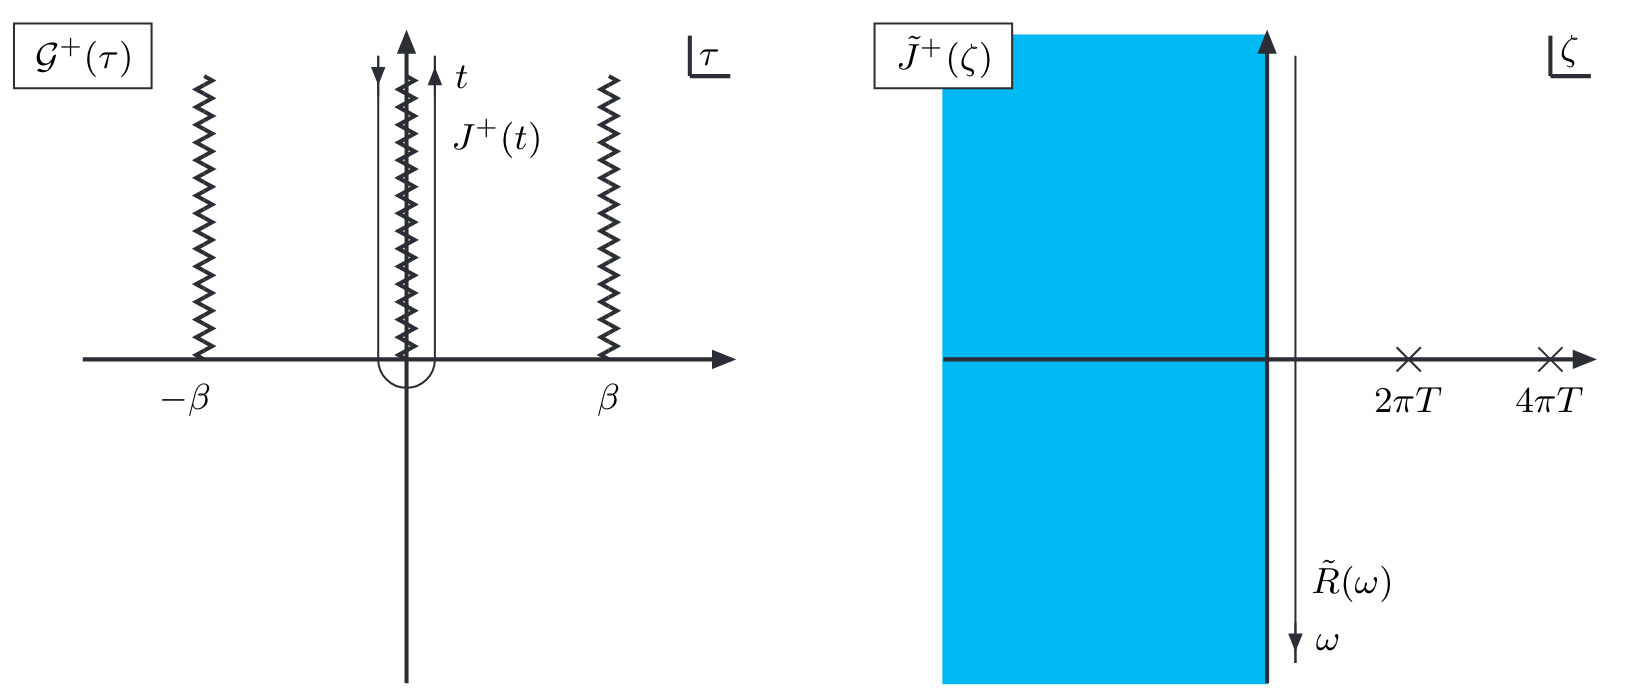
- **Left**: The one-sided Green's function $\mathcal G^+$. $J^+$ is defined as the discontinuity in this function as we cross over $\tau = 0$, which in other words, is the contour integral around the branch cut. 
- **Right**: The Laplace transformation $\tilde{J}^+(\zeta)$ of the discontinuity $J^+(t)$. This Laplace transform is analytic in the right-half of the complex plane, $\mathrm{Re}\,\zeta > 0$, which is everywhere except the blue region. Evaluating $\tilde{J}^+$ on the contour $\zeta = i\epsilon + \omega$  

### Reconstruction Algorithm
1. Compute the Fourier coefficients $\tilde{\mathcal G}(\omega_n)$ for each Matsubara frequency $\omega_n = 2\pi n / \beta$. This can be done with our existing code, just be careful where we evaluate it. Note that these coefficients should be real and symmetric in $\omega_n\rightarrow -\omega_n$, so this should be a decent check. 
2. Compute the coefficients of the power series,
    \begin{equation}
        a_\ell = 2 (-1)^\ell \sum_{n = 0}^\infty \frac{(-1)^n}{n!} \tilde{\mathcal G}(\omega_{n + 1}, \cdot) _2F_1 (-\ell, n + 1; 1; 2)
    \end{equation}
    for each positive $\ell = 0, 1, 2, ...$. Note that the hypergeometric function $_2F_1$ is defined with the parameters,
    \begin{equation}
        _2F_1(a, b; c; z),
    \end{equation}
    which I believe corresponds to the scipy function `scipy.special.hyp2f1(a, b, c, z)`. 
3. Compute the retarded correlator $G(t)$,
    \begin{equation}
        G(t) = \exp\left(-\exp\left(-\frac{2\pi t}{\beta}\right)\right) \sum_{\ell = 0}^\infty a_\ell L_\ell\left(2e^{-2\pi t / \beta}\right)
    \end{equation}
    where $L_\ell$ are the **Laguerre polynomials**, normalized so $L_\ell(0) = 1$, which are given in `scipy.special.laguerre` with the correct normalization. 

### Our setup
We'll now be explicit about our statement of the problem to ensure that it's easy to match it to the setup in hep-lat/1101.5534. 

In [1]:
import os
import sys
import math
from time import time
import numpy as np
import h5py 
import seaborn as sns
import scipy.interpolate as interpolate

PREC = 128
# PREC = 256
import gmpy2 as gmp
gmp.get_context().precision = PREC

from importlib import reload

from utils import *

sys.path.append('/Users/theoares/lqcd/utilities')
import plottools as pt
from formattools import *
pt.set_font()
default_style = styles['notebook']

# from scipy.special import hyp2f1, laguerre

sys.path.append('/Users/theoares/inverse_problems/inverse_problems')
from inverse_problems import nevanlinna as nv
from inverse_problems import carlson as carl
# import carlson as carl

## Spectral function reconstruction

In [2]:
def mpc_conj(c):
    conj_c = np.zeros(c.shape, dtype = object)
    for ii, x in enumerate(c):
        conj_c[ii] = gmp.mpc.conjugate(x)
    return conj_c
def mpc_abs(c):
    """Input c should be a list of gmp.mpc objects."""
    abs_c = np.zeros(c.shape, dtype = object)
    for ii, x in enumerate(c):
        abs_c[ii] = gmp.sqrt(gmp.mpc.conjugate(x) * x).real
    return abs_c
def phase(z):
    return np.exp(1j*np.arctan2(z.imag, z.real))

def generate():
    #os.system("pushd /Users/theoares/lqcd/spectral/python_scripts; python3 generate.py data.h5; mv data.h5 /Users/theoares/inverse_problems/nevanlinna_disk/; popd; pwd;")
    os.system("pwd; python3 generate_CARLSON.py /Users/theoares/lqcd/spectral/simulations/data.h5;")

def run(eta='0.0001', boson = True):
    bos_str = 'boson' if boson else 'fermion'
    os.system(f'/Users/theoares/inverse_problems/nevanlinna_disk/Nevanlinna /Users/theoares/lqcd/spectral/simulations/data.h5 /Users/theoares/lqcd/spectral/simulations/recon_CARLSON.h5 {eta} {bos_str}')
    
def read_ng(fname):
    fname = '/Users/theoares/lqcd/spectral/simulations/' + fname
    with h5py.File(fname, 'r') as ifile:
        # print(ifile['freqs_imag'][:])
        freq_re = np.array(ifile['freqs_real'][:], dtype=float)
        freq_im = np.array(ifile['freqs_imag'][:], dtype=float)
        ng_re = np.array(ifile['ng_real'][:], dtype=float)
        ng_im = np.array(ifile['ng_imag'][:], dtype=float)
        freq = freq_re + 1j*freq_im
        ng = ng_re + 1j*ng_im
    return freq, ng

def read_phis(fname):
    fname = '/Users/theoares/lqcd/spectral/simulations/' + fname
    with h5py.File(fname, 'r') as ifile:
        phis_re = np.array(ifile['phi_real'][:], dtype=float)
        phis_im = np.array(ifile['phi_imag'][:], dtype=float)
        phis = phis_re + 1j*phis_im
    return phis

def read_eigs(fname):
    fname = '/Users/theoares/lqcd/spectral/simulations/' + fname
    with h5py.File(fname, 'r') as ifile:
        eigs_re = np.array(ifile['eigs_real'][:], dtype=float)
        eigs_im = np.array(ifile['eigs_imag'][:], dtype=float)
        #eigs = eigs_re + 1j*eigs_im
        eigs = eigs_re
    return eigs

# def read(fname):
#     fname = '/Users/theoares/lqcd/spectral/simulations/' + fname
#     with h5py.File(fname, 'r') as ifile:
#         # Reconstructed frequencies
#         start = np.array(ifile['start'][:], dtype=float).item()
#         stop = np.array(ifile['stop'][:], dtype=float).item()
#         num = np.array(ifile['num'][:], dtype=int).item()
#         omega = np.linspace(start, stop, num=num)
#         # 
#         real = np.array(ifile['recon_real'][:], dtype=float)
#         imag = np.array(ifile['recon_imag'][:], dtype=float)
#         rho = real + 1j*imag
#     return omega, rho

def read(fname):
    """Reads the wertevorrat."""
    fname = '/Users/theoares/lqcd/spectral/simulations/' + fname
    with h5py.File(fname, 'r') as ifile:
        # Reconstructed frequencies
        start = np.array(ifile['start'][:], dtype=float).item()
        stop = np.array(ifile['stop'][:], dtype=float).item()
        num = np.array(ifile['num'][:], dtype=int).item()
        omega = np.linspace(start, stop, num=num)
        
        rho_alt_real = np.array(ifile['rho_alt_real'][:], dtype = float)
        rho_alt_imag = np.array(ifile['rho_alt_imag'][:], dtype = float)
        rho_alt = rho_alt_real + 1j*rho_alt_imag
        
        delta_rho_minus_real = np.array(ifile['delta_rho_minus_real'][:], dtype = float)
        delta_rho_minus_imag = np.array(ifile['delta_rho_minus_imag'][:], dtype = float)
        delta_rho_minus = delta_rho_minus_real + 1j*delta_rho_minus_imag
        
        delta_rho_plus_real = np.array(ifile['delta_rho_plus_real'][:], dtype = float)
        delta_rho_plus_imag = np.array(ifile['delta_rho_plus_imag'][:], dtype = float)
        delta_rho_plus = delta_rho_plus_real + 1j*delta_rho_plus_imag
    return omega, rho_alt, delta_rho_minus, delta_rho_plus

def read_nev_coeffs(fname):
    fname = '/Users/theoares/lqcd/spectral/simulations/' + fname
    with h5py.File(fname, 'r') as ifile:
        print(ifile.keys())
        
        # Reconstructed frequencies
        start = np.array(ifile['start'][:], dtype=float).item()
        stop = np.array(ifile['stop'][:], dtype=float).item()
        num = np.array(ifile['num'][:], dtype=int).item()
        omega = np.linspace(start, stop, num=num)
        tmp = {}
        for key in ['P','Q','R','S']:
            tmp[f'{key}_re'] = np.array(ifile[f'{key}_real'][:], dtype=float)
            tmp[f'{key}_im'] = np.array(ifile[f'{key}_imag'][:], dtype=float)
        
        # DON'T NORMALIZE: destroys the identities we want to keep intact
        # norm = np.max(np.array(list(tmp.values())))
        # for key in tmp:
        #     tmp[key] = tmp[key]/norm
        nev_coeffs = {}
        
        # Rephase a,b,c,d
        for key in ['P','Q','R','S']:
            nev_coeffs[key] = tmp[f'{key}_re'] + 1j*tmp[f'{key}_im']        
        phi = phase(nev_coeffs['P'][0])
        for key in nev_coeffs:
            nev_coeffs[key] = nev_coeffs[key]/phi
    return omega, nev_coeffs

def build_bspline(x, y):
    t, c, k = interpolate.splrep(x, y, s=0, k=4)
    bspline = interpolate.BSpline(t, c, k, extrapolate=False)
    return bspline    

def kernel(x, x0, sigma):
    dx = x - x0
    return np.exp(-0.5*dx**2/sigma**2) / (np.sqrt(2*np.pi) * sigma)

def analytic_ft(z, m, beta):
    prefactor = -1*(1 + np.exp(-m*beta))
    pole1 = 1/(z - m)
    pole2 = 1/(z + m)
    return prefactor * (pole1 + pole2)

In [3]:
# Generate data
generate()

# Compute spectral function
# eta_str = '1.0'
# eta_str = '0.5'
# eta_str = '0.2'
# eta_str = '0.15'
# eta_str = '0.1'        # default
# eta_str = '0.05'
eta_str = '0.01'
# eta_str = '0.0001'
# eta_str = '1e-8'
# eta_str = '1e-12'
# eta_str = '1e-16'
eta = float(eta_str)
run(eta = eta_str)

# Read spectral
# omega, rho = read("recon_CARLSON.h5")
omega, rho_alt, delta_rho_minus, delta_rho_plus = read("recon_CARLSON.h5")

/Users/theoares/lqcd/spectral/python_scripts
Writing data to: /Users/theoares/lqcd/spectral/simulations/data.h5
Green's function data written to: /Users/theoares/lqcd/spectral/simulations/data.h5

Running Nevanlinna.
Reading input from: /Users/theoares/lqcd/spectral/simulations/data.h5
Writing output to: /Users/theoares/lqcd/spectral/simulations/recon_CARLSON.h5
Running reconstruction with eta = 0.01
Number of measured Matsubara frequencies: 20
Beta is: 48

Eigenvalues: [3.088840633652637682556939970460919627222057326599778176251353737e-17 + 2.991118223175096531409843525035962497042766876318203128992408417e-20i, -3.950369386060848997710555646736008212434147781814810464910789141e-17 + 1.126103379571644864215239166527803739496735144111236098044955861e-18i, -1.042336741252749300994727794770208259047299746669946556514445125e-16 + 3.162924297452550054604131869717829662231191416882684664831058036e-19i, 1.074057485189565849257135237062810119610010360582723919577758446e-16 + -4.970378561280525

Mapping bosonic Green function back to upper half plane.
Computing Wertevorrat.
Spectral function reconstructed.

Recon written to: /Users/theoares/lqcd/spectral/simulations/recon_CARLSON.h5


(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':"Nevanlinna Green's function"}, xlabel='$2\\pi\\omega_n$', ylabel='$C(i\\omega_n)$'>)

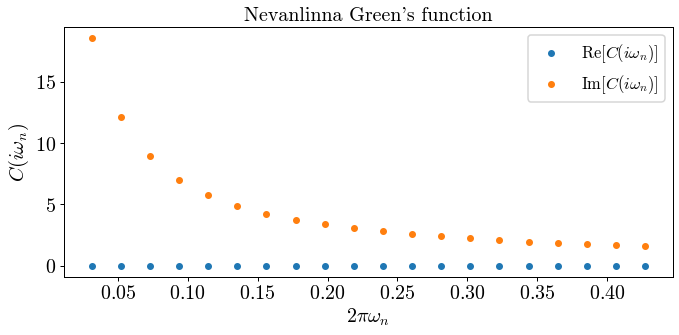

In [4]:
reload(pt)

# NG Green function - on imaginary axis
freq, ng = read_ng("recon_CARLSON.h5")
phis = read_phis("recon_CARLSON.h5")

# Solve the interpolation problem on the disk of w_i = f(z_i)
z_list = nv.moebius(freq)
w_list = nv.moebius(ng)

x = freq.imag / (2*np.pi)
pt.scatter_1d(x, ng, ax_label = [r'$2\pi\omega_n$', r'$C(i\omega_n)$'], mkr = 'o', fn_label = r'C(i\omega_n)', \
              title = 'Nevanlinna Green\'s function', legend = True)

(<Figure size 720x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

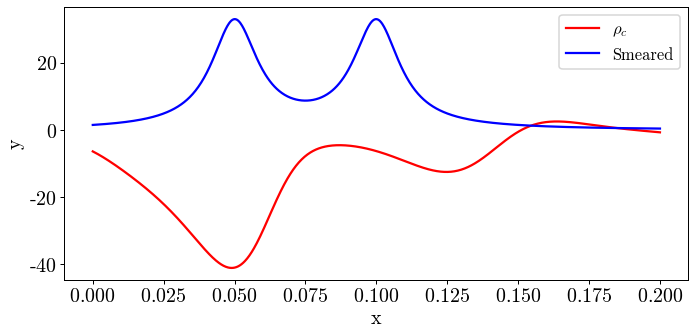

In [5]:
freq, ng = read_ng("recon_CARLSON.h5")
# omega, rho = read("recon_CARLSON.h5")
# omega, rho_alt, delta_rho_minus, delta_rho_plus = read("recon_CARLSON.h5")

# Exact smeared spectral density
def delta_eps(z, epsilon = eta):
    return (epsilon / np.pi) / (z**2 + epsilon**2)
def smeared_sp_fn(omega, masses = [0.05, 0.1]):
    return np.sum([delta_eps(omega - m, epsilon = eta) for m in masses])

# Reconstructed spectral density
fig, ax = pt.plot_1d_data(omega, np.real(rho_alt), ax_label = [r'$\omega$', r'$\rho$'], fn_label = r'$\rho_c$', col = 'r', legend = True)
pt.plot_1d_data(omega, np.array([smeared_sp_fn(w) for w in omega]), ax = ax, col = 'b', fn_label = 'Smeared', legend = True)


## Direct Analytic Continuation with arbitrary data

In [22]:
reload(carl)

# get Matsubara freqs
beta = 48
# M_list = [10, 20, 50, 100]
M_list = [10, 20]
freqs = [carl.get_matsubara(beta, M+1, boson = True)[1:] for M in M_list]

# Get Euclidean time correlator
# for mm in [gmp.mpfr("0.05"), gmp.mpfr("0.1")]:
def analytic_ft(z, m, beta, boson = False):
    #prefactor = -1*(1 + carl.exp(-m*beta))
    prefactor = 1j*(1 + np.exp(-m*beta))
    pole1 = 1/(z - m)
    # pole2 = 1/(z + m)
    sign = -1 if boson else 1
    pole2 = sign/(z + m)
    return prefactor * (pole1 + pole2)
corr = []
for idx, M in enumerate(M_list):
    tmp = np.zeros((M), carl.datatype)
    for mm in [0.05, 0.1]:
        tmp += analytic_ft(freqs[idx], mm, beta)
    corr.append(np.array(tmp))

In [23]:
# Fourier Transform correlator
G_tilde = []
for idx in range(len(M_list)):
    tmp = carl.dft_corr(beta, freqs[idx], corr[idx])
    G_tilde.append(tmp)

In [24]:
# This should be real if corr is real, and the paper says corr should be real. But why???
G_tilde

[array([16.60933473+0.j,  7.18182034+0.j,  3.6053668 +0.j,  1.91885779+0.j,
         1.05001519+0.j,  0.58288153+0.j,  0.32607724+0.j,  0.18319209+0.j,
         0.10316217+0.j,  0.05817145+0.j]),
 array([27.4620553 +0.j, 15.01201404+0.j,  9.44781259+0.j,  6.32605175+0.j,
         4.3831714 +0.j,  3.10156956+0.j,  2.22511397+0.j,  1.61133899+0.j,
         1.1745066 +0.j,  0.86007187+0.j,  0.63191423+0.j,  0.4654014 +0.j,
         0.34336799+0.j,  0.25365903+0.j,  0.18756467+0.j,  0.13878862+0.j,
         0.10274945+0.j,  0.07609739+0.j,  0.05637438+0.j,  0.04177186+0.j])]

In [30]:
reload(carl)
carl.phi(1, 5)

array([0.        +0.j, 1.        +0.j, 3.        +0.j, 2.5       +0.j,
       1.16666667+0.j])

In [7]:
freqs

[array([0.+0.57119866j, 0.+1.14239733j, 0.+1.71359599j, 0.+2.28479466j,
        0.+2.85599332j, 0.+3.42719199j, 0.+3.99839065j, 0.+4.56958931j,
        0.+5.14078798j, 0.+5.71198664j]),
 array([0.+0.2991993j , 0.+0.5983986j , 0.+0.8975979j , 0.+1.1967972j ,
        0.+1.4959965j , 0.+1.7951958j , 0.+2.0943951j , 0.+2.3935944j ,
        0.+2.6927937j , 0.+2.991993j  , 0.+3.2911923j , 0.+3.5903916j ,
        0.+3.8895909j , 0.+4.1887902j , 0.+4.48798951j, 0.+4.78718881j,
        0.+5.08638811j, 0.+5.38558741j, 0.+5.68478671j, 0.+5.98398601j])]

In [8]:
corr

[array([0.+7.21525073j, 0.+3.65756385j, 0.+2.44468124j, 0.+1.83517405j,
        0.+1.46875619j, 0.+1.22424302j, 0.+1.04949571j, 0.+0.91839085j,
        0.+0.81639748j, 0.+0.73478996j]),
 array([0.+13.15515178j, 0. +6.89839162j, 0. +4.64175136j, 0. +3.49275039j,
        0. +2.79846331j, 0. +2.33398877j, 0. +2.00156423j, 0. +1.75193863j,
        0. +1.55762638j, 0. +1.40208762j, 0. +1.27477576j, 0. +1.16864951j,
        0. +1.07882888j, 0. +1.00182531j, 0. +0.93507885j, 0. +0.87666857j,
        0. +0.82512491j, 0. +0.77930448j, 0. +0.73830437j, 0. +0.70140206j])]

## Direct Analytic Continuation with existing data (small, finite number of points)

In [7]:
# Use existing data
freq

array([0.+0.19634954j, 0.+0.32724923j, 0.+0.45814893j, 0.+0.58904862j,
       0.+0.71994832j, 0.+0.85084801j, 0.+0.9817477j , 0.+1.1126474j ,
       0.+1.24354709j, 0.+1.37444679j, 0.+1.50534648j, 0.+1.63624617j,
       0.+1.76714587j, 0.+1.89804556j, 0.+2.02894526j, 0.+2.15984495j,
       0.+2.29074464j, 0.+2.42164434j, 0.+2.55254403j, 0.+2.68344372j])

In [ ]:
laguerre(0)    # constant function 1

In [8]:
ng

array([0.+18.58799059j, 0.+12.14952056j, 0. +8.90653763j, 0. +7.00418166j,
       0. +5.76327116j, 0. +4.89266442j, 0. +4.24910112j, 0. +3.75441612j,
       0. +3.3624932j , 0. +3.04442081j, 0. +2.78117502j, 0. +2.55973504j,
       0. +2.37089303j, 0. +2.20795589j, 0. +2.06594286j, 0. +1.94107157j,
       0. +1.83041844j, 0. +1.73168831j, 0. +1.64305435j, 0. +1.56304448j])

In [ ]:
# 2F1(a, b; c; z) where z is a complex number and a, b, c are real-valued
hyp2f1(-l, n + 1, 1, 2)